In [1]:
import qiskit as q
from qiskit import *
from qiskit.visualization import *
import math
from matplotlib import style
# style.use('dark_background')

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend('statevector_simulator')

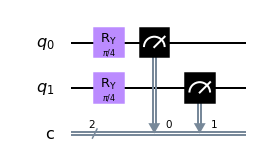

In [2]:
c = QuantumCircuit(2,2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
orig_statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

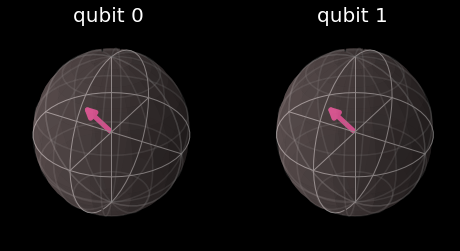

In [3]:
plot_bloch_multivector(orig_statevector)

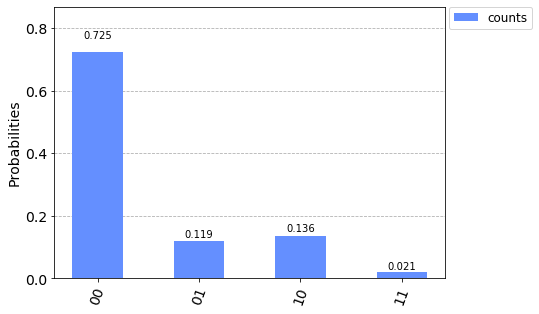

In [79]:
orig_counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

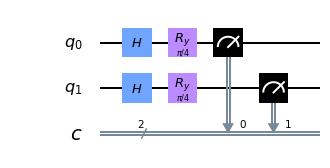

In [80]:
# Uncertain Qubits, hadamard at front
c = QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

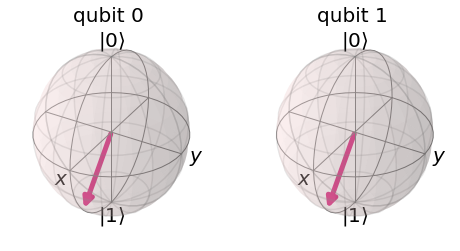

In [81]:
plot_bloch_multivector(statevector)

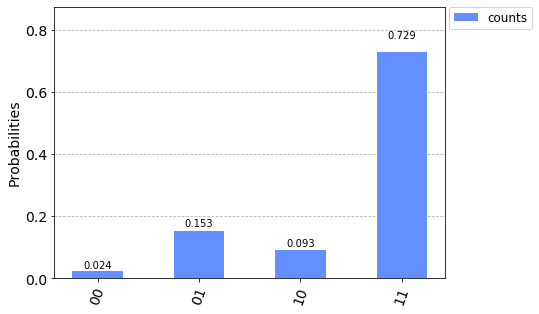

In [82]:
counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

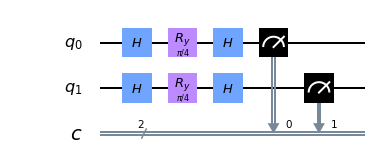

In [84]:
# Hadamard Sandwich on Uncertain Qubits
c = QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

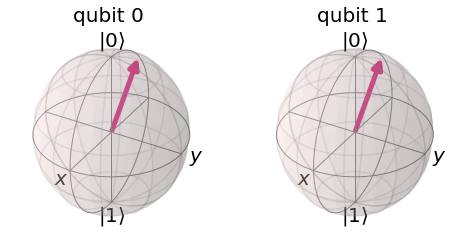

In [85]:
plot_bloch_multivector(statevector)

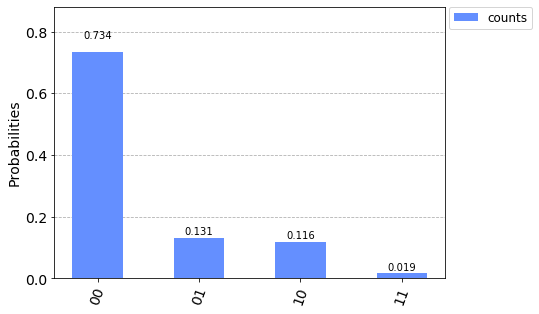

In [86]:
counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

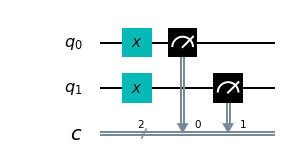

In [87]:
# Certain Qubits
c = QuantumCircuit(2,2)

c.x(0)
c.x(1)

orig_statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

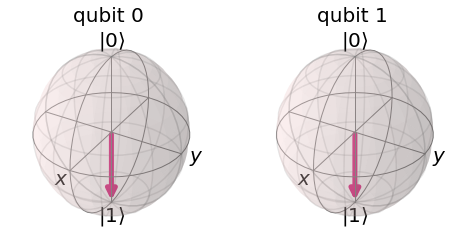

In [88]:
plot_bloch_multivector(orig_statevector)

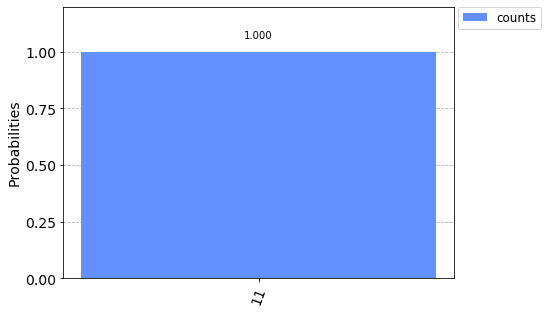

In [89]:
orig_counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

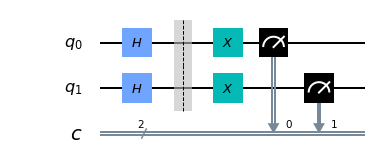

In [96]:
# hadamard in front of certain qubits
c = QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.barrier()
c.x(0)
c.x(1)

statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

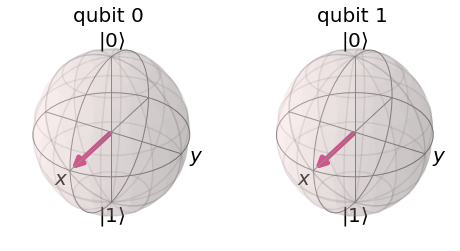

In [91]:
plot_bloch_multivector(statevector)

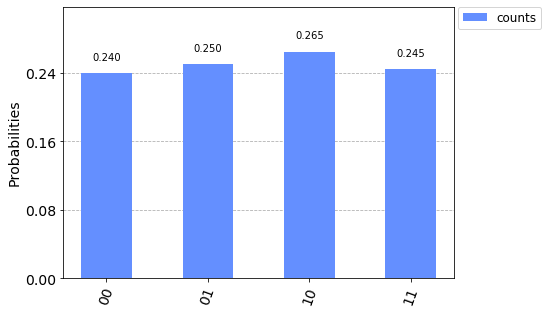

In [92]:
counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

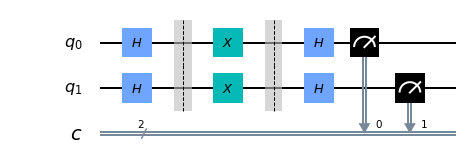

In [97]:
# hadamard sandwich of certain qubits
c = QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.barrier()
c.x(0)
c.x(1)
c.barrier()
c.h(0)
c.h(1)
statevector = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw('mpl')

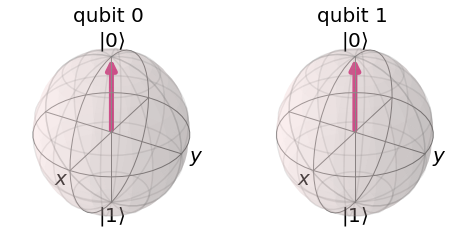

In [98]:
plot_bloch_multivector(statevector)

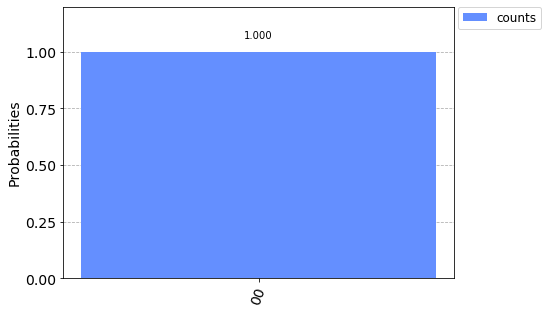

In [99]:
counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [101]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def const_back_box(c):
    return c

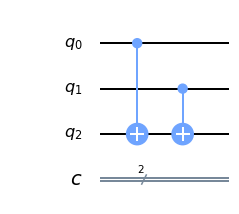

In [103]:
c = QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw('mpl')

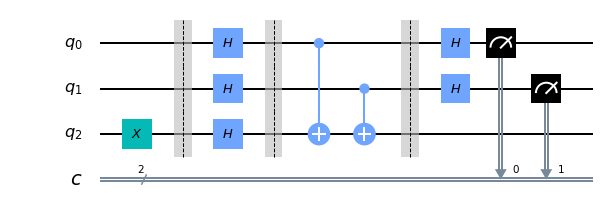

In [109]:
c = QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# c.h(2)
c.measure([0,1], [0,1])
c.draw('mpl')

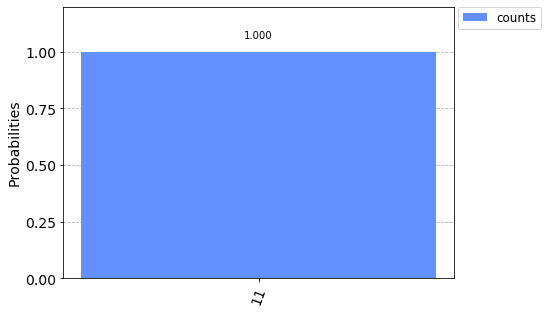

In [110]:
counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [9]:
def plot_bloch_vector_spherical(theta, phi,r):
    x = r*math.sin(theta)*math.cos(phi)
    y = r*math.sin(theta)*math.sin(phi)
    z = r*math.cos(theta)
    
    return x,y,z

4.329780281177467e-17 -0.7071067811865476 0.7071067811865476


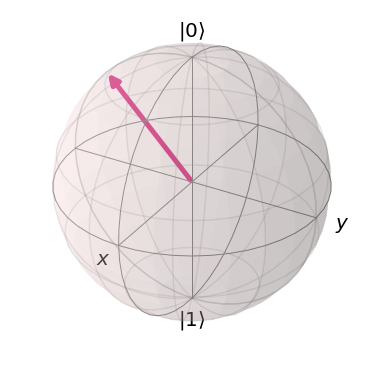

In [23]:
coords = [math.pi/4,-math.pi/2,1] # [Theta, Phi, Radius]
x,y,z = plot_bloch_vector_spherical(coords[0], coords[1], coords[2])
print(x,y,z)
sph_coords=[x,y,z]
plot_bloch_vector(sph_coords)